In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

application_df = pd.read_csv("application_info.csv", index_col="id")
flag_df = pd.read_csv("default_flg.csv", index_col="id")

***Посмотрим на данные из датафреймов***

In [85]:
application_df.head()

,application_dt,sample_cd,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg
id,,,,,,,,,,,,,,,,,,
1,01JAN2014,train,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N
2,01JAN2014,train,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N
3,01JAN2014,train,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N
4,01JAN2014,train,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N
5,01JAN2014,train,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N


In [87]:
flag_df.head()

,default_flg
id,
1,0
2,0
3,0
4,0
5,0


***И на метаданные***

In [100]:
application_df.columns

Index(['application_dt', 'sample_cd', 'education_cd', 'gender_cd', 'age',
       'car_own_flg', 'car_type_flg', 'appl_rej_cnt', 'good_work_flg',
       'Score_bki', 'out_request_cnt', 'region_rating', 'home_address_cd',
       'work_address_cd', 'income', 'SNA', 'first_time_cd', 'Air_flg'],
      dtype='object')

In [106]:
application_df.dtypes

application_dt     datetime64[ns]
sample_cd                  object
education_cd               object
gender_cd                  object
age                         int64
car_own_flg                object
car_type_flg               object
appl_rej_cnt                int64
good_work_flg               int64
Score_bki                 float64
out_request_cnt             int64
region_rating               int64
home_address_cd             int64
work_address_cd             int64
income                      int64
SNA                         int64
first_time_cd               int64
Air_flg                    object
dtype: object

In [110]:
application_df.describe()

,application_dt,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd
count,205296,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000,205296.000000
mean,2014-05-25 02:06:42.338087168,39.354566,0.277297,0.169701,-1.967120,2.015826,57.332340,1.602218,2.520210,42251.807610,1.725864,2.791657
min,2014-01-01 00:00:00,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000
25%,2014-02-28 00:00:00,30.000000,0.000000,0.000000,-2.313894,1.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000
50%,2014-04-20 00:00:00,37.000000,0.000000,0.000000,-1.990599,2.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000
75%,2014-07-15 00:00:00,48.000000,0.000000,0.000000,-1.641914,3.000000,70.000000,2.000000,3.000000,50000.000000,2.000000,4.000000
max,2015-03-31 00:00:00,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000
std,NaN,11.451011,0.782794,0.375371,0.488055,2.138564,13.262627,0.520577,0.689453,45183.110679,1.115876,1.024393


In [301]:
# изменим формат столбца application_dt на дату 
application_df['application_dt'] = pd.to_datetime(application_df['application_dt'], format='%d%b%Y')

<Axes: xlabel='sample_cd'>

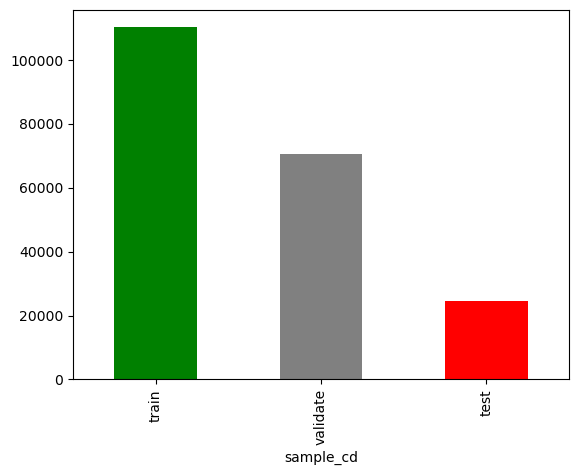

In [303]:
# посмотрим, какое количество данных мы берем для обучения, валидации и тестирования модели с помощью столбчатой диаграммы
application_df['sample_cd'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])

***Запомним индексы строк из application_df, для: тренировки, валидации и тестовой выборками***

In [307]:
train_ind = application_df[application_df['sample_cd'] == 'train']['sample_cd'].index
validate_ind = application_df[application_df['sample_cd'] == 'validate']['sample_cd'].index
test_ind = application_df[application_df['sample_cd'] == 'test']['sample_cd'].index

In [157]:
validate_ind

Index([110149, 110150, 110151, 110152, 110153, 110154, 110155, 110156, 110157,
       110158,
       ...
       180807, 180808, 180809, 180810, 180811, 180812, 180813, 180814, 180815,
       180816],
      dtype='int64', name='id', length=70668)

In [159]:
# поскольку мы уже разбили наши данные на обучающие, валидационные и тестовые, то удалим столбец sample_cdе
# также моджно удалить столбец application_dt, поскольку, интуитивно понятно, связь между временем года и тем, выплатил ли клиент долг банку отсутствует

In [309]:
application_df.drop(['sample_cd', 'application_dt'], axis=1, inplace=True)

In [173]:
application_df.head()

,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg
id,,,,,,,,,,,,,,,,
1,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N
2,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N
3,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N
4,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N
5,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N


In [311]:
# поскольку наша модель работает лишь с числовыми данными, то воспользуемся dummy кодированием, чтобы заменить категориальные признаки на числовые
categorical_columns = [col for col in application_df.columns if application_df.dtypes[col] == 'object' or application_df.dtypes[col] == 'str']
categorical_columns

['education_cd', 'gender_cd', 'car_own_flg', 'car_type_flg', 'Air_flg']

In [313]:
# заполним пропуски в столбцах из categorical_columns, если они есть
application_df.isnull().any()

education_cd        True
gender_cd          False
age                False
car_own_flg        False
car_type_flg       False
appl_rej_cnt       False
good_work_flg      False
Score_bki          False
out_request_cnt    False
region_rating      False
home_address_cd    False
work_address_cd    False
income             False
SNA                False
first_time_cd      False
Air_flg            False
dtype: bool

In [315]:
# как видим, они есть только в education_cd. Тогда заменим пропуски из этого столбца на моду этого столбца
application_df['education_cd'] = application_df['education_cd'].fillna(application_df['education_cd'].mode()[0])

In [354]:
# dummy кодировка
dummy_encoding = pd.get_dummies(application_df[categorical_columns], drop_first=True) # drop_first для устранения мультиколлинеарности 
dummy_encoding = dummy_encoding.astype(int)
dummy_encoding.head()

,education_cd_GRD,education_cd_PGR,education_cd_SCH,education_cd_UGR,gender_cd_M,car_own_flg_Y,car_type_flg_Y,Air_flg_Y
id,,,,,,,,
1,0,0,1,0,1,1,1,0
2,1,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0
4,1,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0


In [356]:
# заменим нечисловые поля на новые
application_df.drop(categorical_columns, axis=1, inplace=True)
application_df = pd.concat([application_df, dummy_encoding], axis=1)
application_df.head()

,age,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,...,car_type_flg_Y,Air_flg_Y,education_cd_GRD,education_cd_PGR,education_cd_SCH,education_cd_UGR,gender_cd_M,car_own_flg_Y,car_type_flg_Y,Air_flg_Y
id,,,,,,,,,,,,,,,,,,,,,
1,27,0,0,-1.917831,0,40,2,3,32000,1,...,1,0,0,0,1,0,1,1,1,0
2,26,0,0,-1.153144,2,60,2,3,50000,2,...,0,0,1,0,0,0,0,0,0,0
3,35,0,1,-1.732810,0,40,1,2,20000,4,...,0,0,0,0,1,0,1,0,0,0
4,35,0,1,-2.552133,2,20,2,3,80000,1,...,0,0,1,0,0,0,0,0,0,0
5,24,0,0,-1.914581,1,50,2,3,27000,1,...,0,0,0,0,0,1,0,0,0,0


***Теперь реализуем Weight of Evidence (WoE) и Information Value (IV). Они помогут нам устранить мусорные переменные и привести признаки в нужный для модели вид***
```
WoE_i = ln((доля значений таргета)_i / (доля значений таргета)) - ln([1 - (доля значений таргета)_i] / [1 - (доля значений таргета)])
 
IV = sum((доля значений таргета)_i/(доля значений таргета) - [1 - (доля значений таргета)_i] / [1 - (доля значений таргета)]) * WoE_i * ((количество наблюдений в бакете)_i / (количество наблюдений в бакете))) 
```

In [321]:
# tr — среднее значение целевой переменной target (доля дефолтов в бакете)
# cnt — количество наблюдений в бакете (size)


# ф-ия, рисующая зависимость WoE от среднего значения признака в бакете
def WoE(target, feature, nbuck=10):
    """
    target: целевая переменная, 
    feature: признак,
    nbuck: количество бакетов; default=10
    """
    # создаем пустой дф и копируем столбцы с таргетом и фичами в него
    df = pd.DataFrame()
    df['target']  = target.copy()
    df['feature'] = feature.copy()
    #Считаем номер бакета
    df['feature_buck'] = df['feature'].rank(method='min', pct=1, na_option = 'top').apply(
        lambda x: int((x- 1/df.shape[0])*nbuck))
    # запоминаем среднее значение целевой переменной и кол-во наблюдений
    tr  = df['target'].mean()
    cnt = df['target'].count()
    # aгрегируем по каждому бакету 
    df = (df.groupby('feature_buck').agg(
        tr=('target', 'mean'),       # среднее target (доля дефолтов)
        cnt=('target', 'size'),      # колво наблюдений
        feature_av=('feature', 'mean')  # среднее  feature
        ).reset_index())
    # 'mean' — вычисляет среднее значение target
    # 'size' — подсчитывает число наблюдений в группе
    # случай крайних значений tr_i = 0 или 1 делаем сглаживание: 0 -> 1e-3, 1-> 999e-3
    df.tr = df.tr.apply(lambda x: max(0.001, min(0.999, x)))
    # считаем WoE
    df.eval('WoE = log(tr/@tr)-log((1-tr)/(1-@tr))', inplace=True)
    # погрешность WoE
    df.eval('WoE_d = 2/sqrt(tr*(1-tr)*cnt)', inplace=True) 
    # убираем наблюдения с пустым значением признака
    df.dropna(inplace=True)
    
    # график
    fig = plt.gcf()
    plt.grid()
    plt.errorbar(df['feature_av'], df.WoE, yerr=np.array((df['WoE_d'])))
    plt.xlabel('feature')
    plt.ylabel('WoE')
    plt.show()

# ф-ия, возвращающая IV признака-feature с целевой переменной target
def IV(target, feature, nbuck=10):
    """
    target: целевая переменная, 
    feature: признак,
    nbuck: количество бакетов; default=10
    """
    df = pd.DataFrame()
    df['target']  = target.copy()
    df['feature'] = feature.copy()
    df['feature_buck'] = df['feature'].rank(method='min', pct=1, na_option = 'top').apply(
        lambda x: int((x- 1.0/df.shape[0])*nbuck))
    tr  = df['target'].mean()
    cnt = df['target'].count()
    df = df.groupby('feature_buck')['target'].agg(
        tr='mean',      # Доля дефолтов (среднее значение)
        cnt='size'      # Количество наблюдений
        )
    df.tr = df.tr.apply(lambda x: max(0.001, min(0.999, x)))
    # считаем IV
    df.eval('IV = ( (tr/@tr) - ((1-tr)/(1-@tr))) * (log(tr/@tr) - log((1-tr)/(1-@tr)) ) * (cnt/@cnt)', inplace=True)
    IV = df.IV.sum()
    return IV

---
***WoE***

```
Нарисуем гистограмму 
```

<Axes: ylabel='Frequency'>

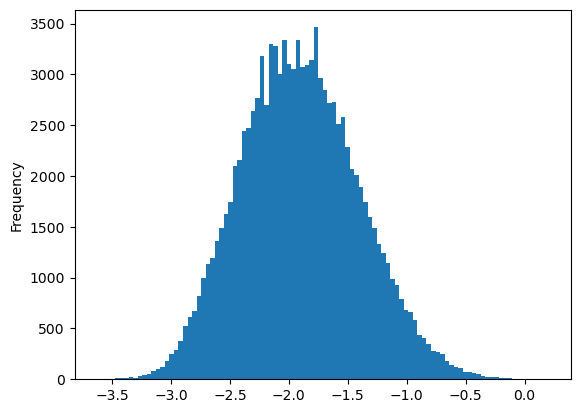

In [260]:
application_df.loc[train_index].Score_bki.plot.hist(bins=100)

```
зависимость WoE от признака
```

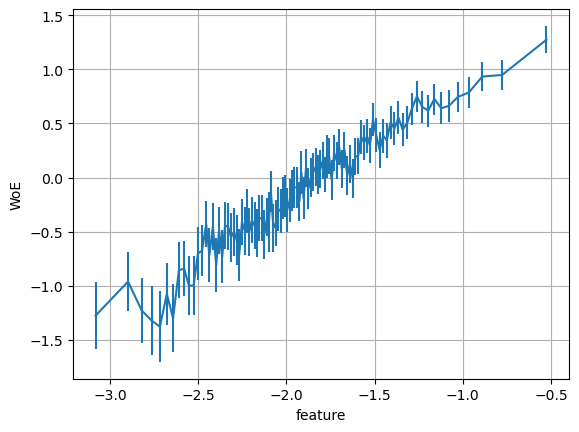

In [262]:
WoE(flag_df.loc[train_ind].default_flg, application_df.loc[train_ind].Score_bki, nbuck=100)

```
найдем IV
```

In [266]:
IV(flag_df.loc[train_ind].default_flg, application_df.loc[train_ind].Score_bki, nbuck=100)

0.2956781856350897

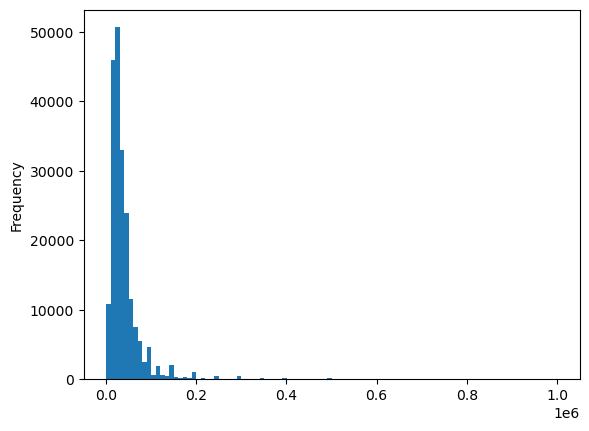

In [268]:
# гистограмма
application_df.income.plot.hist(bins=100);

```
признак "Доход" имеет не такую же зависимость, как у Score_bki
```

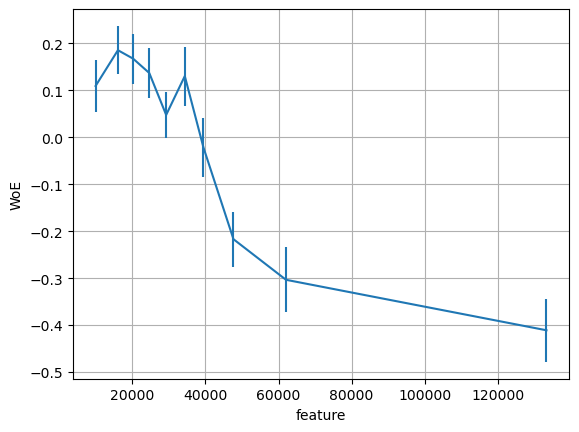

In [270]:
WoE(flag_df.loc[train_ind].default_flg, application_df.loc[train_train_indindex].income, nbuck=10)

In [273]:
# найдем IV от различных преобразований столбца income

print(IV(flag_df.loc[train_ind].default_flg, application_df.loc[train_ind].income, nbuck=10))
print(IV(flag_df.loc[train_ind].default_flg, application_df.loc[train_ind].income.apply(lambda x: np.log(x)), nbuck=10))
print(IV(flag_df.loc[train_ind].default_flg, application_df.loc[train_ind].income.apply(lambda x: int(x > 40000)), nbuck=10))

0.03837794897479724
0.03837794897479724
0.03354139550049351


In [437]:
# заметим, что iv у флага "доход > 40000" не сильно меньше, потому вводим флаг в замен старого признака.

application_df['income_40k_flg'] = application_df.income.apply(lambda x: int(x > 40000))
application_df.drop('income', axis=1, inplace=True)

---
Перейдем к логистической регрессии
---

```
выберем параметр регуляризации на валидационной выборке
```

In [439]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(application_df.loc[train_ind])
X_validate_scaled = scaler.transform(application_df.loc[validate_ind])
X_test_scaled = scaler.transform(application_df.loc[test_ind])

In [442]:
print('%8s %8s %4s' % ('Train','Validate','C'))
for C in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    LR = LogisticRegression(C=C, solver='saga', penalty='l1', max_iter=500)
    
    # обучение на масштабированных данных
    LR.fit(X_train_scaled, flag_df.loc[train_ind].default_flg)
    
    # предикт на масштабированных данных
    AUC_train = roc_auc_score(
        flag_df.loc[train_ind].default_flg,
        LR.predict_proba(X_train_scaled)[:,1]
    )
    # метрика roc_auc 
    AUC_validate = roc_auc_score(
        flag_df.loc[validate_ind].default_flg,
        LR.predict_proba(X_validate_scaled)[:,1]
    )
    
print('%.6f %.6f %f' % (AUC_train, AUC_validate, C)) # AUC_train с 6 знаками после запятой; AUC_validate с 6 знаками после запятой; C со стандартной точностью

   Train Validate    C
0.729297 0.715732 100.000000


In [441]:
LR_best = LogisticRegression(C=C, solver='saga', penalty='l1', max_iter=1090)
LR.fit(application_df.loc[train_ind], flag_df.loc[train_ind].default_flg)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=100, max_iter=500, penalty='l1', solver='saga')

```
Выводим коэффициенты
```


In [443]:
pd.DataFrame(LR.coef_.T, index=application_df.columns, columns=['coef'])

,coef
age,-0.062830
appl_rej_cnt,0.106042
good_work_flg,-0.092393
Score_bki,0.489005
out_request_cnt,0.153604
region_rating,-0.323703
home_address_cd,0.148270
work_address_cd,0.197097
SNA,0.162797
first_time_cd,-0.091997


In [570]:
# предсказания модели на тестовых данных
y_pred = LR.predict(application_df.loc[test_ind])
test_probability = LR.predict_proba(application_df.loc[test_ind])[:,1]
test_pd = pd.DataFrame(test_probability, columns=['score'], index=test_ind)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


```
сохраним результат в csv
```

In [574]:
test_pd = pd.DataFrame(test_pd, columns=['score'], index=test_ind)
test_pd.to_csv('my_submission.csv')
print(test_pd.shape)
test_pd.head(2)

(24480, 1)


,score
id,
180817,3.849793e-11
180818,4.830067e-11
